In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_bbox(path,IMG_SIZE):
    temp=[]
    _,file= os.path.split(path)
    with open(path) as f:
        for i in f:
            box=i.split(' ')
            x = float(box[1]) *IMG_SIZE
            y = float(box[2]) *IMG_SIZE
            w = float(box[3]) *IMG_SIZE
            h = float(box[4]) *IMG_SIZE
            temp.append([file,x,y,w,h])
    return temp
def distribution_of_aspect_ratio(PATH,IMG_SIZE,plot_name):
    cols=['ID','X','Y','W','H']
    df=pd.DataFrame(columns=cols)
    for file in os.listdir(PATH):
        file_path= os.path.join(PATH, file)
        boxes= get_bbox(file_path, IMG_SIZE)
        temp_df=pd.DataFrame(boxes,columns= cols )
        df = pd.concat([df, temp_df], ignore_index=True)
    df['aspect_ratio']= (df['W']/df['H']).round(4)
    plt.figure(figsize=(6, 6))
    plt.hist(df['aspect_ratio'], bins=20, edgecolor='black', alpha=0.7)
    plt.title('Distribution of vessel size of '+plot_name)
    plt.xlabel('aspect_ratio')
    plt.ylabel('Frequency of ships')
    plt.grid(False)
    plt.savefig(plot_name+'.png')
    plt.show()
        
        

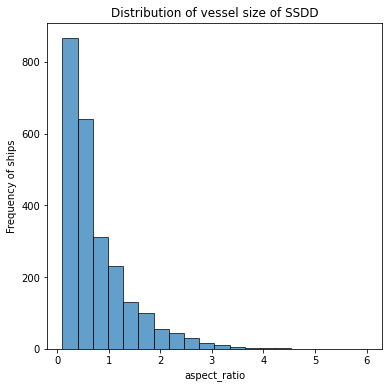

In [3]:
bboxes=distribution_of_aspect_ratio(os.path.normpath('Datasets/SSDD/labels/'), 416, 'SSDD') # pass the dataset label location, image size and the name